In [1]:
# Soccer Data Analysis
# High level flow of Data Analysis Project
# Download European Soccer Data from Kaggle 

In [ ]:
# Import Libraries
# sqllite3 - for connecting to sqllite relational database
# pandas and numpy - data ingestion and manipulation
# matplotlib - data visualization
# sklearn modules - machine learning libraries

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [7]:
# Read the data
# df is the pandas dataframe

In [9]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("select * from player_attributes", cnx)

In [12]:
# Explore the attributes
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [17]:
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [18]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [20]:
rows = df.shape[0]
print(rows)

183978


In [24]:
df = df.dropna()
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [26]:
rows - df.shape[0]

3624

In [28]:
df = df.reindex(np.random.permutation(df.index))

In [30]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
99856,99857,198213,202210,2013-05-31 00:00:00,80.0,86.0,right,medium,low,44.0,...,61.0,74.0,32.0,39.0,29.0,15.0,6.0,12.0,8.0,16.0
160200,160201,175243,31070,2014-11-14 00:00:00,67.0,67.0,right,medium,medium,43.0,...,51.0,59.0,60.0,70.0,62.0,15.0,7.0,16.0,8.0,9.0
56072,56073,8471,11865,2010-02-22 00:00:00,63.0,69.0,left,None,9,50.0,...,69.0,69.0,59.0,62.0,58.0,5.0,22.0,65.0,22.0,22.0
130559,130560,190456,157838,2007-02-22 00:00:00,60.0,74.0,right,high,medium,60.0,...,62.0,61.0,58.0,66.0,68.0,1.0,22.0,53.0,22.0,22.0
30804,30805,192387,161660,2013-05-31 00:00:00,75.0,85.0,right,high,low,50.0,...,65.0,74.0,26.0,30.0,22.0,5.0,7.0,14.0,11.0,5.0


In [32]:
df[:10][['penalties','overall_rating']]

,penalties,overall_rating
99856,74.0,80.0
160200,59.0,67.0
56072,69.0,63.0
130559,61.0,60.0
30804,74.0,75.0
173204,56.0,67.0
24400,58.0,68.0
120595,84.0,75.0
74030,42.0,63.0
31357,62.0,74.0


In [34]:
potentialFeatures = ['acceleration','curve','free_kick_accuracy','ball_control','shot_power','stamina']

In [36]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f, related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [44]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [46]:
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [48]:
len(cols), len(correlations)

(34, 34)

In [65]:
def plot_dataframe(df, y_label):
    color = 'coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75);
    plt.show()

In [66]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

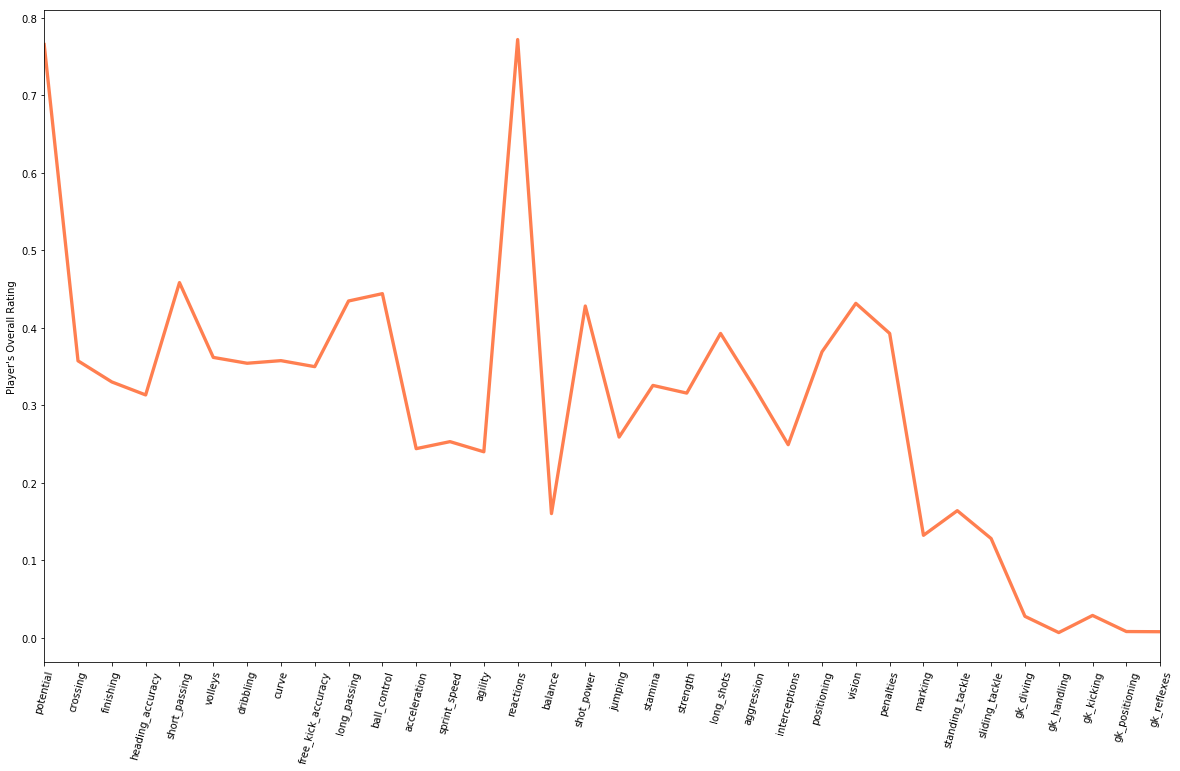

In [68]:
plot_dataframe(df2, 'Player\'s Overall Rating')

In [70]:
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [72]:
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [74]:
df_select = df[select5features].copy(deep=True)
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
99856,12.0,86.0,32.0,27.0,39.0
160200,16.0,67.0,60.0,66.0,70.0
56072,65.0,69.0,59.0,67.0,62.0
130559,53.0,74.0,58.0,56.0,66.0
30804,14.0,85.0,26.0,30.0,30.0


In [77]:
data = scale(df_select)
noOfClusters = 4
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [79]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50199
1    55899
2    23776
3    50480
dtype: int64

In [81]:
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.337737,-0.843331,0.548217,0.407303,0.550691,0
1,-0.477069,0.105830,-0.947810,-0.975243,-0.914308,1
2,1.920702,0.037383,-1.111877,-0.653773,-1.201297,2
3,-0.039924,0.704429,1.027665,0.982578,1.030205,3


In [83]:
%matplotlib inline

C:\Users\ratubati\Documents\ramu self\TechLearn\EdX\DataScienceUsingPython\Week-1-Intro-New\customplot.py:31: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


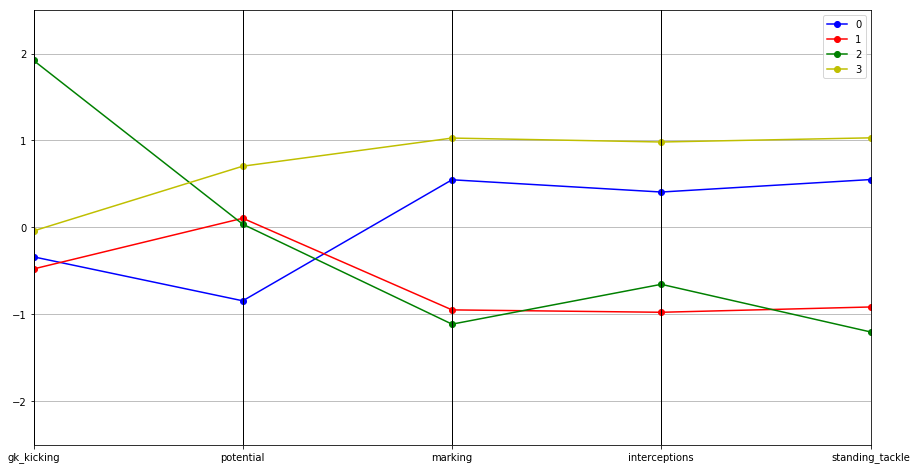

In [84]:
parallel_plot(P)